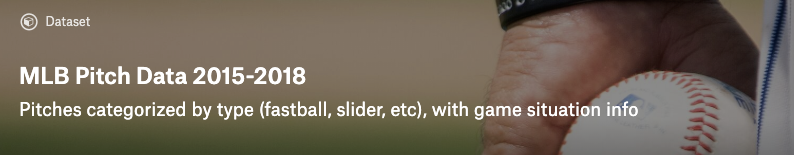

## ~3 million pitches and ~750,000 "at bats" from ~10,000 games
## Make a new column in *atbats* corresponding to a successful *hit* (1) or an "out" (0)
## Filter out all pitches that were "balls" (b_count of next pitch is b_count+1).
## Pairplot of percentage of hits (*atbats*) versus various mean pitch statistics from *pitches* with one data point for each pitcher.

![](http://)![](http://)## Plot histogram of the top 20 pitchers (*player_names*) ordered by the highest percentage of outs (*atbats*) per pitch (*pitches*).

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pitches = pd.read_csv('../input/pitches.csv')
pitches.rename(columns={'ab_id':'atbat_id'}, inplace=True)
print(pitches.shape)
print(pitches.columns)
pitches.head(2)

In [ ]:
atbats = pd.read_csv('../input/atbats.csv')
atbats.rename(columns={'ab_id':'atbat_id'}, inplace=True)
print(atbats.shape)
atbats.head(2)

In [ ]:
player_name = pd.read_csv('../input/player_names.csv')
player_name.rename(columns={'id':'batter_id'}, inplace=True)
print(player_name.shape)
player_name.head()

Solution

In [ ]:
player_name['Full_Name'] = player_name['first_name']+' '+player_name['last_name']

pitches['speed_diff'] = pitches['start_speed']-pitches['end_speed']

#the pitch result (ball or strike) is not provided so we have to compute it
pitches['isball'] = (pitches['b_count']- pitches['b_count'].shift(-1)) < 0

pitches.head(30)


## now lets remove all pitches that were balls

In [ ]:
pitches = pitches[pitches['isball']!=True]
pitches.head()

In [ ]:
atbats['hit'] = atbats['event'].map(lambda row: not 'out' in row).astype(int)
atbats.head()

In [ ]:
merged1_df = pd.merge(pitches, atbats,  how='left', left_on='atbat_id', right_on = 'atbat_id')

In [ ]:
big_df = pd.merge(merged1_df, player_name,  how='left', left_on='batter_id', right_on = 'batter_id')


In [ ]:
big_df.head()

## Best Pitchers

In [ ]:
groupedby_pid = big_df.groupby(['pitcher_id']).mean()
count = big_df.groupby(['pitcher_id']).count()
groupedby_pid = groupedby_pid[count['hit']>100]

In [ ]:
groupedby_pid.head()

In [ ]:
plt.figure(figsize=(10,6))
ax = sbn.pairplot(groupedby_pid[['start_speed','speed_diff','spin_rate','break_length','hit']],kind="reg",plot_kws={'scatter_kws':{'s':2}});

# Plot a bar chart of the top to batters to hit when pitchers threw during their atbat with end_speed over 90 miles per hour

In [ ]:
atbat_results = big_df[big_df['end_speed']>90.].groupby(['batter_id','atbat_id']).aggregate('mean')
atbat_results.head(20)

In [ ]:
best_batters = atbat_results[atbat_results.groupby(['batter_id']).count()>40].dropna().groupby(['batter_id'])[['hit']].mean()
best_batters.head(10)

In [ ]:
best_batters_withnames = pd.merge(best_batters, player_name,  how='left', left_on='batter_id', right_on = 'batter_id')

In [ ]:
best_batters_withnames.sort_values(by='hit',ascending=False)[:20].plot.bar(x='Full_Name',y='hit',figsize=(15,8), ylim=(.4,.6),rot=45);